# Speech Emotion Recognition

In [ ]:
%pip install playsound

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wave
import os
from playsound import playsound

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Loading the dataset

In [20]:
# Create a new numpy array to store the .wav files
files = np.array([])
labels = np.array([])
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        # Reading the wav file
        if filename.endswith('.wav'):
            # Read the wav file (mono)
            files = np.append(files, os.path.join(dirname, filename))
            labels = np.append(labels, filename.split("_")[2])

## Audio Processing

In [23]:
def playAudio(path):
    playsound(path)
    
def getAudioSignal(path):
    fileData = wave.open(path, 'rb')
    # Extract Raw Audio from Wav File
    signal = fileData.readframes(-1)
    signal = np.frombuffer(signal, dtype='int16')
    # Get the frame rate
    frameRate = fileData.getframerate()
    # Find the time of the audio file
    time = np.linspace(0, len(signal) / frameRate, num=len(signal))
    return signal, time

def plotSignal(signal, time):
    plt.figure(figsize=(15, 5))
    plt.plot(time, signal)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Audio Signal')
    plt.show()

def plotHistogram(data, dataTitle):
    plt.figure(figsize=(15, 5))
    plt.hist(data, bins=15)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title('Histogram of the ' + dataTitle)
    plt.show()


### Reading, Plotting and Playing the Audio

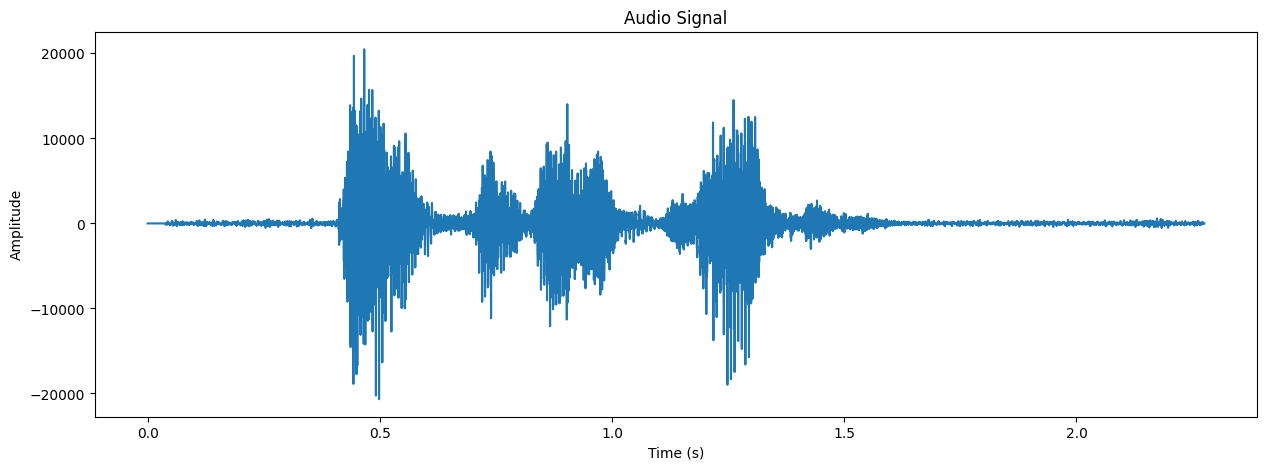

In [24]:
audioSignal, audioTime = getAudioSignal(files[0])
plotSignal(audioSignal, audioTime)
playAudio(files[0])

## Feature Extraction

- We will create two feature spaces from the audio.
  - We can work on time domain, or we can work in frequency domain. There are multiple of features that can help improving the model:
    - Zero crossing rate: The rate of sign-changes of the signal during the duration of a particular frame.
    - Energy: The sum of squares of the signal values, normalized by the respective frame length.
  - Convert the audio waveform to mel spectrogram and use this as the feature space.

## Splitting the Dataset

In [ ]:
x_train_val, x_test, y_train_val, y_test = train_test_split(files, labels, train_size=0.7, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, train_size=0.95, random_state=42, stratify=y_train_val)
# Plotting the histogram of the training data
plotHistogram(y_train, 'Training Data')
# Plotting the histogram of the validation data
plotHistogram(y_val, 'Validation Data')
# Plotting the histogram of the testing data
plotHistogram(y_test, 'Testing Data')

- We have the choice of either undersampling or oversampling the dataset. We will not be using either of them as they are not very effective in this case since the differences in number of samples is not big. We will be using the entire dataset as it is.

## Building The model